In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset in the python Environment and make PassengerId as index column

In [112]:

tit_data=pd.read_csv('/content/titanic_dataset.csv',index_col='PassengerId')

Checking basic detailes of the dataset

In [113]:
tit_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
tit_data.shape #shows the number of rows and columns in the dataset

(891, 11)

In [115]:
tit_data.info()#shows information of the data

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [116]:
tit_data.describe()#Shows the stataistical information of the data

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [117]:
tit_data.isnull().sum()# Checking for the missing values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Handling Missing Values

In [118]:
# Almost 70% of data is missing in the Cabin column and NAme is not useful for the prediction so desided to drop thaese columns
tit_data.drop(['Cabin','Name'],axis=1,inplace=True)

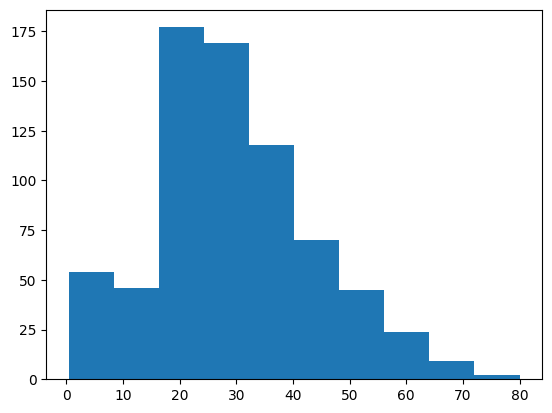

In [119]:
plt.hist(tit_data['Age'])
plt.show()

In [120]:
tit_data['Age']=tit_data['Age'].fillna(tit_data['Age'].median())

In [121]:
#embarked has only 2 missing values so desided to drop that row
tit_data=tit_data.dropna()

In [122]:
tit_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [123]:
tit_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


# Checking for outliers

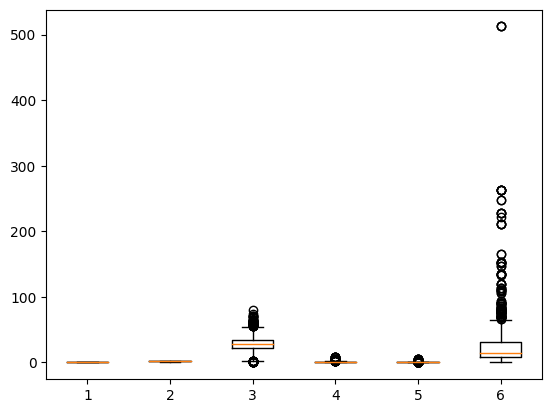

In [124]:
graphs = tit_data.select_dtypes(include=['float','int64'])
plt.boxplot(graphs)
plt.show()

# Handling Outliers

IQR = 13.0
lower whisker:  2.5
upper whisker:  54.5


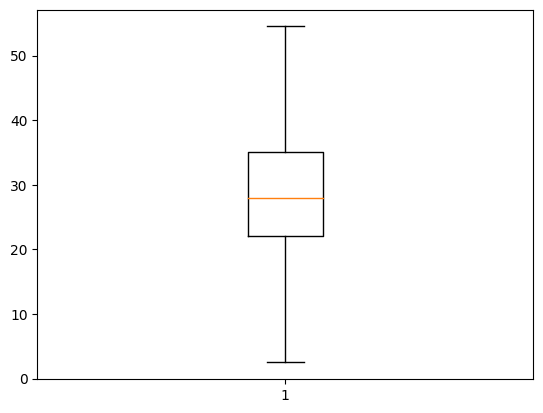

In [125]:
# Handling Outliers
Q1 = np.percentile(tit_data['Age'],25,method='midpoint')
Q3 = np.percentile(tit_data['Age'],75,method='midpoint')
IQR = Q3-Q1
print('IQR =',IQR)
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
print("lower whisker: ",low_lim)
print("upper whisker: ",up_lim)
tit_data['Age'] = tit_data['Age'].clip(lower=low_lim,upper=up_lim)
plt.boxplot(tit_data['Age'])
plt.show()

IQR = 1.0
lower whisker:  -1.5
upper whisker:  2.5


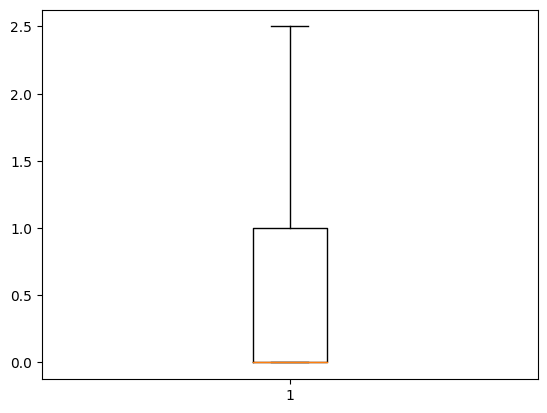

In [126]:

Q1 = np.percentile(tit_data['SibSp'],25,method='midpoint')
Q3 = np.percentile(tit_data['SibSp'],75,method='midpoint')
IQR = Q3-Q1
print('IQR =',IQR)
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
print("lower whisker: ",low_lim)
print("upper whisker: ",up_lim)
tit_data['SibSp'] = tit_data['SibSp'].clip(lower=low_lim,upper=up_lim)
plt.boxplot(tit_data['SibSp'])
plt.show()

IQR = 23.1042
lower whisker:  -26.7605
upper whisker:  65.6563


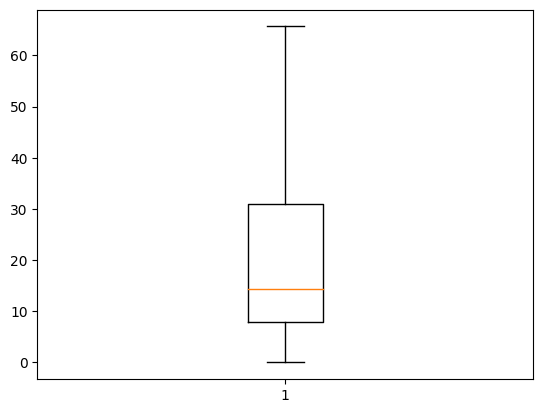

In [127]:
Q1 = np.percentile(tit_data['Fare'],25,method='midpoint')
Q3 = np.percentile(tit_data['Fare'],75,method='midpoint')
IQR = Q3-Q1
print('IQR =',IQR)
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
print("lower whisker: ",low_lim)
print("upper whisker: ",up_lim)
tit_data['Fare'] = tit_data['Fare'].clip(lower=low_lim,upper=up_lim)
plt.boxplot(tit_data['Fare'])
plt.show()

# Encoding Categorical Variables

In [128]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tit_data['Ticket']=le.fit_transform(tit_data['Ticket'])

In [129]:
tit_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [130]:
tit_data=pd.get_dummies(tit_data,columns=['Embarked','Sex'],dtype='int')

In [131]:
tit_data.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1.0,0,522,7.2500,0,0,1,0,1
2,1,1,38.0,1.0,0,595,65.6563,1,0,0,1,0
3,1,3,26.0,0.0,0,668,7.9250,0,0,1,1,0
4,1,1,35.0,1.0,0,48,53.1000,0,0,1,1,0
5,0,3,35.0,0.0,0,471,8.0500,0,0,1,0,1


In [132]:
# Define features (X) and target variable (y)
x = tit_data.drop('Survived', axis=1)
y = tit_data['Survived']

# Feature Scaling

In [133]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [134]:
X=scaler.fit_transform(x)
X=pd.DataFrame(X)
X.columns=x.columns
X.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1.0,0.375000,0.4,0.0,0.768778,0.110424,0.0,0.0,1.0,0.0,1.0
1,0.0,0.682692,0.4,0.0,0.876289,1.000000,1.0,0.0,0.0,1.0,0.0
2,1.0,0.451923,0.0,0.0,0.983800,0.120704,0.0,0.0,1.0,1.0,0.0
3,0.0,0.625000,0.4,0.0,0.070692,0.808757,0.0,0.0,1.0,1.0,0.0
4,1.0,0.625000,0.0,0.0,0.693667,0.122608,0.0,0.0,1.0,0.0,1.0
